<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 6.3 MB/s eta 0:00:00a 0:00:01


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


<Axes: ylabel='MEDV'>

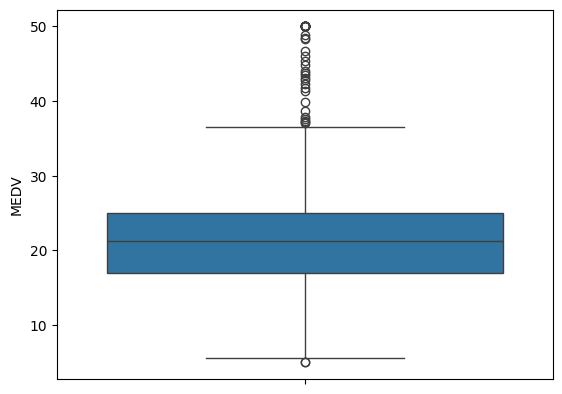

In [6]:
## For the "Median value of owner-occupied homes" provide a boxplot

sns.boxplot(y="MEDV",data=boston_df)

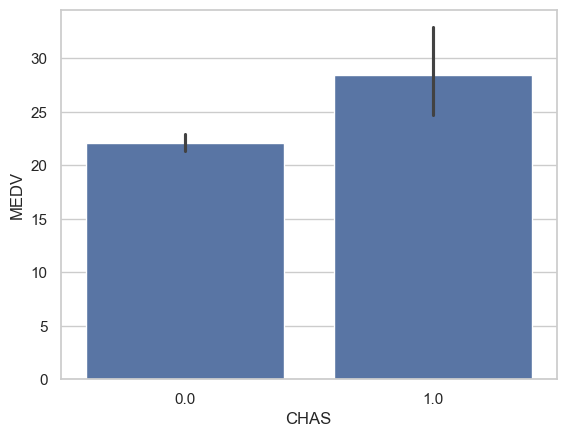

In [10]:
## Provide a  bar plot for the Charles river variable
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", y="MEDV", data=boston_df)

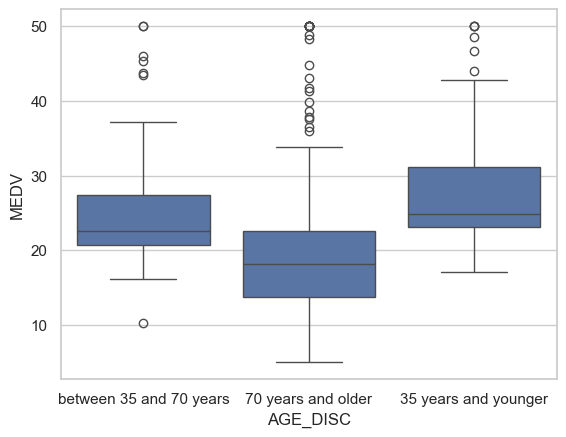

In [26]:
##Provide a boxplot for the MEDV variable vs the AGE variable. 
##(Discretize the age variable into three groups of 35 years and younger, 
## between 35 and 70 years and 70 years and older)
def categorize_age(age):
    if age < 35:
        return '35 years and younger'
    elif 35 <= age < 70:
        return 'between 35 and 70 years'
    else:
        return '70 years and older'

boston_df['AGE_DISC']=boston_df['AGE'].apply(categorize_age)

ax = sns.boxplot(y="MEDV", x="AGE_DISC", data=boston_df)

<Axes: xlabel='INDUS', ylabel='NOX'>

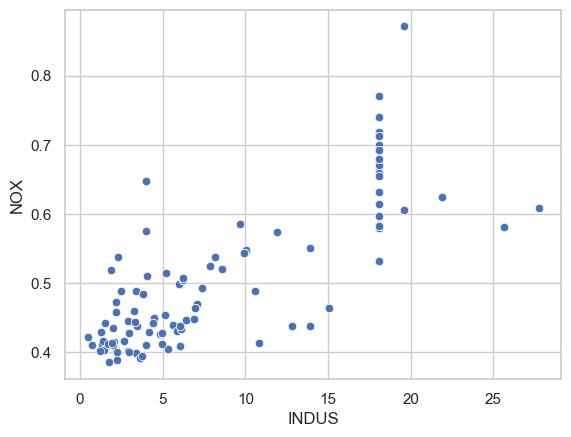

In [30]:
##  Provide a scatter plot to show the relationship between Nitric oxide concentrations 
##  and the proportion of non-retail business acres per town. 
##  What can you say about the relationship?
sns.scatterplot(y="NOX", x="INDUS",
            data=boston_df)

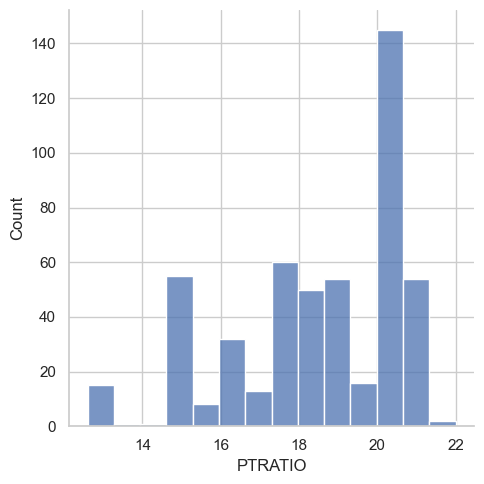

In [35]:
##Create a histogram for the pupil to teacher ratio variable
ax=sns.displot(boston_df['PTRATIO'],kde=False)


**The following describes the dataset variables:**

     **CRIM - per capita crime rate by town**

     **ZN - proportion of residential land zoned for lots over 25,000 sq.ft.**

     INDUS - proportion of non-retail business acres per town.

     CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

     NOX - nitric oxides concentration (parts per 10 million)

     RM - average number of rooms per dwelling

     AGE - proportion of owner-occupied units built prior to 1940

     DIS - weighted distances to five Boston employment centres

     RAD - index of accessibility to radial highways

     TAX - full-value property-tax rate per $10,000

     PTRATIO - pupil-teacher ratio by town

     LSTAT - % lower status of the population

     MEDV - Median value of owner-occupied homes in $1000's


**Is there a significant difference in median value of 
houses bounded by the Charles river or not? (T-test for independent samples)**
**H0: mu_1= mu_2** \n
**HA: mu_1 != mu_2**

In [54]:

print([boston_df[boston_df['CHAS']==0]['MEDV'].mean(),boston_df[boston_df['CHAS']==0]['MEDV'].std()])
print([boston_df[boston_df['CHAS']==1]['MEDV'].mean(),boston_df[boston_df['CHAS']==1]['MEDV'].std()])
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'])


[np.float64(22.093842887473464), np.float64(8.831362409577908)]
[np.float64(28.439999999999998), np.float64(11.816643297634458)]


TtestResult(statistic=np.float64(-3.996437466090509), pvalue=np.float64(7.390623170519902e-05), df=np.float64(504.0))

**p-value is < 0.05 we cannot reject the null hypothesis that the two means are different.**

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

In [37]:
## Is there a significant difference in median value of 
## houses bounded by the Charles river or not? (T-test for independent samples)
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [81]:

boston_df.loc[(boston_df['AGE']<=48),'AGE_DISC']='48 years and younger'
boston_df.loc[(boston_df['AGE']>48)&(boston_df['AGE']<68),'AGE_DISC']='between 48 and 68 years'
boston_df.loc[(boston_df['AGE']>=68),'AGE_DISC']='68 years and older'
fifty_lower=boston_df[boston_df['AGE_DISC']=='48 years and younger']['MEDV']
fifty_eighty=boston_df[boston_df['AGE_DISC']=='between 48 and 68 years']['MEDV']
eighty_older=boston_df[boston_df['AGE_DISC']=='68 years and older']['MEDV']
fifty_lower

3      33.4
12     21.7
16     23.1
18     20.2
37     21.0
       ... 
355    20.6
483    21.8
484    20.6
494    24.5
495    23.1
Name: MEDV, Length: 140, dtype: float64

In [82]:
scipy.stats.levene(fifty_lower,fifty_eighty,eighty_older,center='mean')

LeveneResult(statistic=np.float64(1.319699937182651), pvalue=np.float64(0.2681390577436576))

In [83]:
f_statistic, p_value = scipy.stats.f_oneway(fifty_lower, fifty_eighty, eighty_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 34.0625585713684, P-Value: 1.3379390083454837e-14


Since the p-value is less than 0.05, we will reject the null hypothesis that ther is a difference in median values of houses (MEDV)

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**



In [84]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


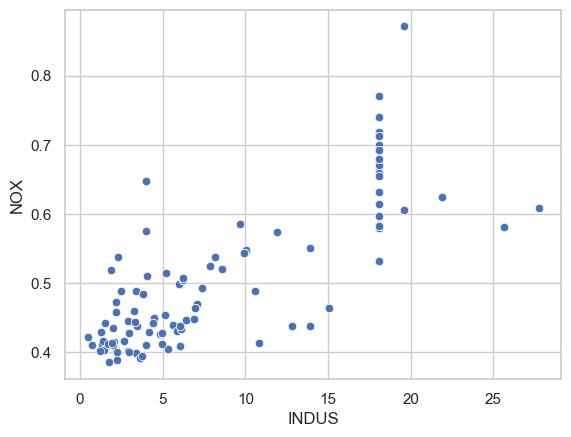

In [86]:
ax = sns.scatterplot(y="NOX", x="INDUS", data=boston_df)

In [87]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241171e-98))

**Since the Coorelation Coefficienct is 0.764, with p<0.05, there is big positive relationship between the two coefficeints.**

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

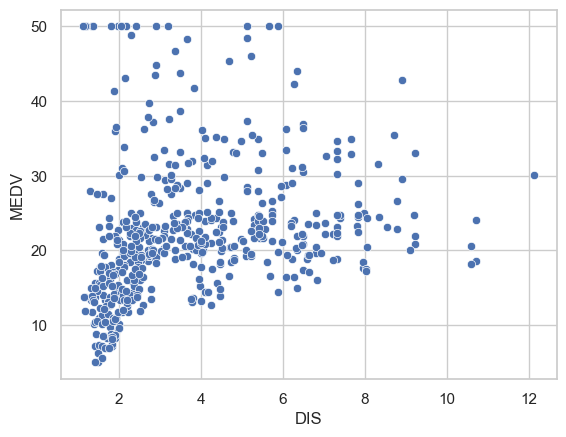

In [90]:
ax = sns.scatterplot(x='DIS', y='MEDV',data=boston_df)

In [92]:
## X is the input variables (or independent variables)
X = boston_df['MEDV']
## y is the target/dependent variable
y = boston_df['DIS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        16:57:17   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression model demonstrates that MEDV has a statistically significant (p<0.05) but weak positive relationship R-squared 0.062 with DIS.